In [3]:
import pickle
# path=r'D:\MyWorks\糖尿病预测\强化学习方法\rl4bg\bgp\saves\basal_bolus\bb_adolescent#001_seed0.pkl'
path=r'saves/adolescent#001_0/ep_r_list_GRUQ.pkl'
with open(path,'rb') as f:
    a=pickle.load(f)
print(a)

[-100051.44488887394, -200104.75574922992, -300158.93154880055, -400210.08187113336, -500261.4892080056, -600315.693375387, -700370.5566655861, -100054.59802957223, -200109.1221830138, -300163.76433993096, -400216.7754329583, -500270.8428076926, -600324.1049582472, -700378.9141414688, -800434.0484449399, -900487.1614039495, -1000539.7052780128, -100054.81843144249, -200107.37356629528, -100055.30071053606, -200110.2907525578, -300165.2702044215, -100054.90059962923, -200108.87918180684, -300165.1359684833, -11.532020786278006, -100051.72393918877, -200106.51695911752, -300161.2735065735, -100054.31146329675, -200109.48221948263, -300163.5980294837, -400216.905989289, -100055.49202619116, -200111.0924786677, -300167.0710098705, -400222.1054095845, -500276.33310975146, -600329.4076061118, -700385.9777775378, -100055.52272437658, -200109.79479367277, -300165.4076380058, -400221.48316436884, -500277.2061250604, -600331.7686232125, -100056.27019580561, -200109.16034842608, -100052.409560458

In [1]:
import joblib
data=joblib.load(r'D:\MyWorks\糖尿病预测\强化学习方法\rl4bg\bgp\saves\pid\adolescent#006_simulation_8weeks.pkl')

In [2]:
data

[(                             BG         CGM  CHO   insulin      LBGI  \
  Time                                                                   
  2018-01-01 00:00:00  134.670000  157.783198  0.0  0.000000  0.000000   
  2018-01-01 00:05:00  134.669968  157.211798  0.0  0.189050  0.000000   
  2018-01-01 00:10:00  134.667870  155.323882  0.0  0.000000  0.000000   
  2018-01-01 00:15:00  134.648396  153.886041  0.0  0.000000  0.000000   
  2018-01-01 00:20:00  134.576560  153.260223  0.0  0.000000  0.000000   
  ...                         ...         ...  ...       ...       ...   
  2018-02-26 23:40:00  113.395457  120.520845  0.0  0.000000  0.000000   
  2018-02-26 23:45:00  112.611340  117.121435  0.0  0.000000  0.000000   
  2018-02-26 23:50:00  111.744316  115.390864  0.0  0.000000  0.001651   
  2018-02-26 23:55:00  110.801491  114.495284  0.0  0.000000  0.008200   
  2018-02-27 00:00:00  109.802147  113.580429  0.0  0.005625  0.020715   
  
                           HBGI    

In [5]:
import numpy as np
import joblib
from collections import namedtuple
import matplotlib.pyplot as plt
import itertools
# plt.rcParams['font.sas-serig']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# %pylab inline

Seeds = namedtuple('seeds', ['numpy_seed', 'sensor_seed', 'scenario_seed'])
name = 'basal_bolus'
server = 'mld4'
source_path = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg/bgp'
save_path = 'saves'
full_path = '{}/{}'.format(save_path, name)


seeds = [i for i in range(5)]
# patients = (['adolescent#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
#             ['child#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
#             ['adult#0{}'.format(str(i).zfill(2)) for i in range(1, 11)])
patients = (['child#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
            ['adolescent#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
            ['adult#0{}'.format(str(i).zfill(2)) for i in range(1, 11)])
settings = itertools.product(patients, seeds)

# 获取bb方法得到的每个病人的risk值
bb_risk_mean={}
for name,seed in settings:
    data=joblib.load('{}/bb_{}_seed{}.pkl'.format(full_path, name, seed))
    if name not in bb_risk_mean:
        bb_risk_mean[name]=[data['Risk'].mean()]
    else:
         bb_risk_mean[name].append(data['Risk'].mean())

In [6]:
import joblib
from collections import namedtuple
import matplotlib.pyplot as plt
import itertools
# plt.rcParams['font.sas-serig']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# %pylab inline

data_dir = 'saves' # '/data/dir'
source_dir = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg'  # '/source/dir'
name = 'pid_random_meal'
save_dir = '{}/{}'.format(data_dir, name)

person_options = (['adolescent#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
                  ['child#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
                  ['adult#0{}'.format(str(i).zfill(2)) for i in range(1, 11)])
n_days = 10
n_seeds = 100
n_seeds = 5
seed_offset = 1234
full_save = False
residual_bolus = False
tstd_options = [0.1, 1, 10]
pid_res={}
for person in person_options:
    a=joblib.load('{}/{}_simulation.pkl'.format(save_dir, person))
    risk_list=[]
    for i in a:
        risk_list.append(i['hist']['Risk'].mean())
    pid_res[person]=risk_list


[Text(0, 0.0, '$10^0$'),
 Text(0, 0.3010299956639812, ''),
 Text(0, 0.47712125471966244, ''),
 Text(0, 0.6020599913279624, ''),
 Text(0, 0.6989700043360189, ''),
 Text(0, 0.7781512503836436, ''),
 Text(0, 0.8450980400142568, ''),
 Text(0, 0.9030899869919435, ''),
 Text(0, 0.9542425094393249, ''),
 Text(0, 1.0, '$10^1$'),
 Text(0, 1.3010299956639813, ''),
 Text(0, 1.4771212547196624, ''),
 Text(0, 1.6020599913279623, ''),
 Text(0, 1.6989700043360187, ''),
 Text(0, 1.7781512503836436, ''),
 Text(0, 1.845098040014257, ''),
 Text(0, 1.9030899869919435, ''),
 Text(0, 1.954242509439325, ''),
 Text(0, 2.0, '$10^2$'),
 Text(0, 2.3010299956639813, ''),
 Text(0, 2.4771212547196626, ''),
 Text(0, 2.6020599913279625, ''),
 Text(0, 2.6989700043360187, ''),
 Text(0, 2.7781512503836434, ''),
 Text(0, 2.845098040014257, ''),
 Text(0, 2.9030899869919438, ''),
 Text(0, 2.9542425094393248, '')]

<Figure size 800x800 with 0 Axes>

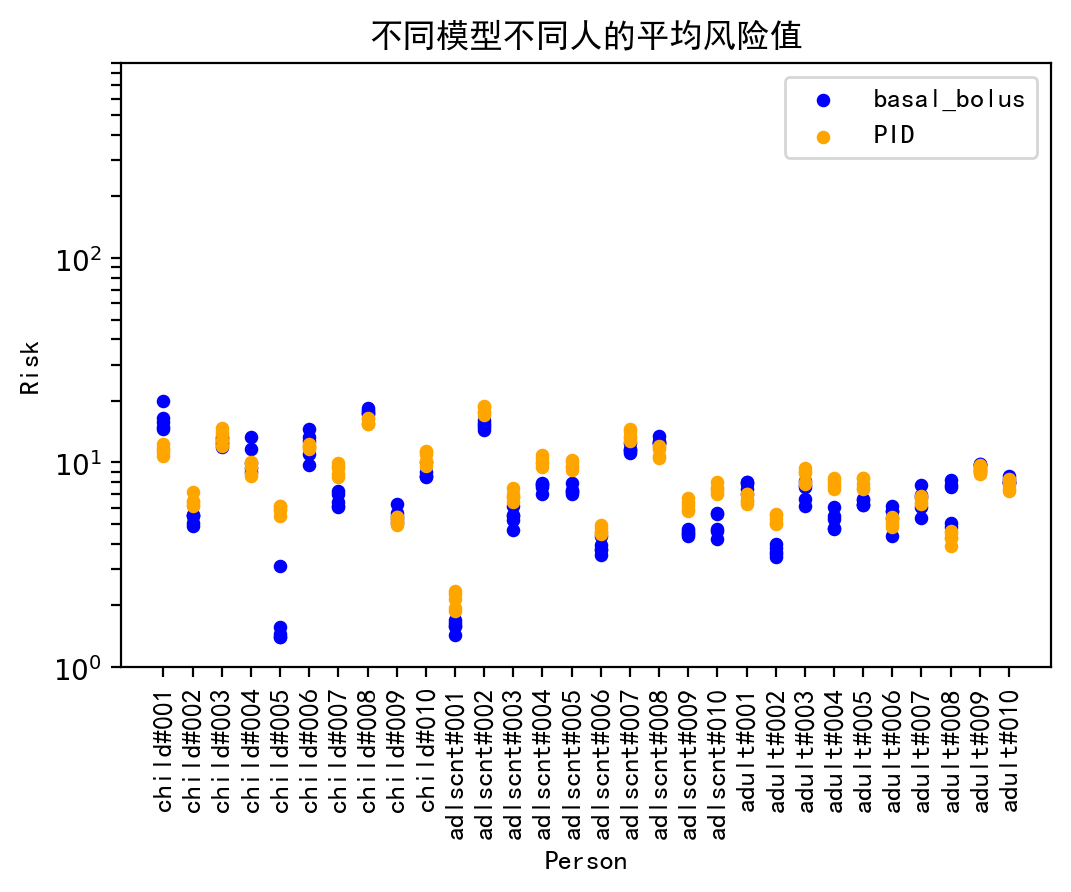

In [56]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(4,4),dpi=200)
fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
for patient in bb_risk_mean.keys():
    bb_x=[]
    bb_y=[]
    for risk_mean in bb_risk_mean[patient]:
        bb_x.append(patient)
        bb_y.append(np.log10(risk_mean))
    ax.scatter(bb_x,bb_y,color='blue',s=15,label='basal_bolus')

    pid_x=[]
    pid_y=[]
    for risk_mean in pid_res[patient]:
        pid_x.append(patient)
        pid_y.append(np.log10(risk_mean))

    ax.scatter(pid_x,pid_y,color='orange',s=15,label='PID')

# 设置坐标轴
patients_short = (['child#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
            ['adlscnt#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
            ['adult#0{}'.format(str(i).zfill(2)) for i in range(1, 11)])
plt.xticks(range(len(patients)),patients_short,rotation='vertical')
plt.xlabel('Person')
plt.ylabel('Risk')
# plt.ylim(0,30)
plt.yticks([0,1,2])
# plt.ytickslabels(['1','10','100'])
plt.legend(['basal_bolus','PID'])
plt.title('不同模型不同人的平均风险值')
# 设置指数形式的纵坐标
ytrick=[]
for mul in [1,10,100]:
    for i in range(1,10):
        ytrick.append(np.log10(i*mul))
        # ytrick.append(i*mul)
ytrick_label=['']*len(ytrick)
ytrick_label[0]=r'$10^0$'
ytrick_label[9]=r'$10^1$'
ytrick_label[18]=r'$10^2$'

ax.set_yticks(ytrick)
ax.set_yticklabels(ytrick_label)

Text(0.5, 1.0, 'adolescent#001网络训练过程')

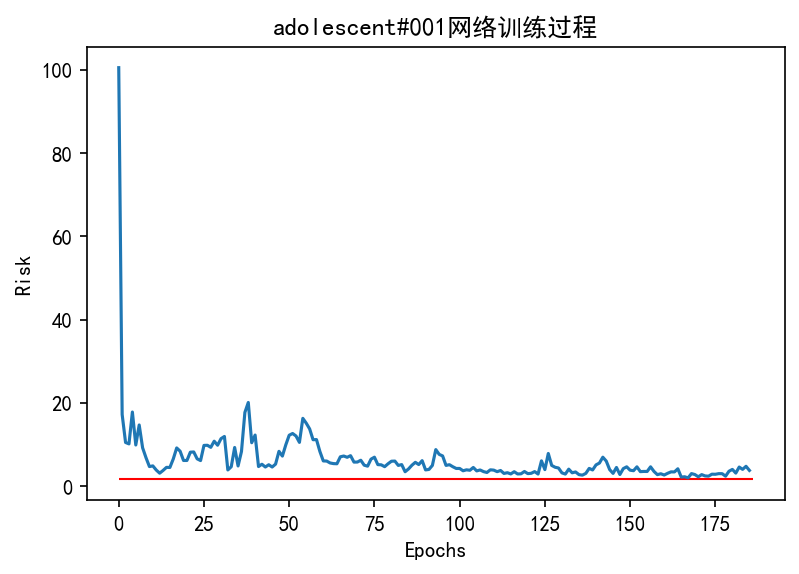

In [113]:
import pandas as pd 
data=pd.read_csv('saves_rlkit/dqn/adolescent#001.csv')
data=data.dropna(subset=['Risk'],axis=0).reset_index(drop=True)[:300]
# print(data['Risk'])

plt.figure(figsize=(6,4),dpi=150)
plt.plot(data['Risk'])

# plt.hlines(13.38,0,data.shape[0],colors='red',lw=1)
plt.hlines(1.6,0,data.shape[0],colors='red',lw=1)
# plt.hlines(9.83,0,data.shape[0],colors='red',lw=1)
plt.xlabel('Epochs')
plt.ylabel('Risk')
plt.title('adolescent#001网络训练过程')

In [1]:
import joblib
grid, settings = joblib.load('rl/dir/pid_tune_experiment_name_0/grid_and_settings.pkl')

In [30]:
import pandas as pd
patients=pd.read_csv('rl/dir/pid_setting.csv',header=None)
patient_dict={}
for i in patients.iterrows():
    patient=i[1].values[0].split('  ')
    patient_dict[patient[0]]=[float(i) for i in patient[1:]]

In [44]:
import joblib
import pandas as pd
# 正常饮食
data_dir = 'saves' # '/data/dir'
source_dir = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg'  # '/source/dir'
name = 'pid'
save_dir = '{}/{}'.format(data_dir, name)

person_options = (['adolescent#0{}'.format(str(i).zfill(2)) for i in [6,8]] +
                  ['child#0{}'.format(str(i).zfill(2)) for i in [6,8]] +
                  ['adult#0{}'.format(str(i).zfill(2)) for i in [6,8]])

for person in person_options:
    data=joblib.load('{}/{}_simulation.pkl'.format(save_dir, person))
    print("当前用户为"+person)
    for index,detail in enumerate(data):
        if index==0:
            result=pd.DataFrame.from_dict(detail['statistics'])
        else:
            result=result.append(pd.DataFrame.from_dict(detail['statistics']))
    print(result.describe())

当前用户为adolescent#006
             Risk   MagniRisk     Glucose       MinBG       MaxBG     Insulin  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     4.748297    9.954110  118.833800   46.832002  332.138276    0.033479   
std      0.284563    0.548859    1.012115    3.904881   17.255762    0.000700   
min      4.051191    8.697037  116.012885   36.193455  295.152323    0.031431   
25%      4.591402    9.588246  118.174794   44.182424  319.965807    0.032973   
50%      4.761050    9.996011  118.944679   46.680137  329.664040    0.033542   
75%      4.971986   10.378217  119.383050   49.600963  344.879202    0.034023   
max      5.259157   11.009030  121.557321   54.064620  387.999975    0.034968   

       MinIns      MaxIns    GLen  Euglycemic  Hypoglycemic  Hyperglycemic  
count   100.0  100.000000   100.0  100.000000    100.000000     100.000000  
mean      0.0    0.321848  4033.0    0.788797      0.063070       0.148133  
std       0.0    0.

In [70]:
data_dir = 'saves' # '/data/dir'
source_dir = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg'  # '/source/dir'
name = 'pid'
save_dir = '{}/{}'.format(data_dir, name)

person_options = (['adolescent#0{}'.format(str(i).zfill(2)) for i in [7,8]] +
                  ['child#0{}'.format(str(i).zfill(2)) for i in [7,8]] +
                  ['adult#0{}'.format(str(i).zfill(2)) for i in [7,8]])


for person in person_options:
    data=joblib.load('{}/{}_simulation_tstd1.pkl'.format(save_dir, person))
    print("当前用户为"+person)
    print(data[0]['kp'],data[0]['ki'],data[0]['kd'])

当前用户为adolescent#007
-0.0001 -1e-07 -0.001
当前用户为adolescent#008
-1e-05 -1e-07 -0.01
当前用户为child#007
-0.0001 -1e-07 -0.001
当前用户为child#008
-1e-05 -1e-07 -0.001
当前用户为adult#007
-1e-05 -1e-07 -0.01
当前用户为adult#008
-0.0001 -1e-07 -0.01


In [104]:
import os
data_dir = 'saves' # '/data/dir'
source_dir = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg'  # '/source/dir'
name = 'pid'
save_dir = '{}/{}'.format(data_dir, name)

person_options = (['adolescent#0{}'.format(str(i).zfill(2)) for i in [8]] +
                  ['child#0{}'.format(str(i).zfill(2)) for i in [8]] +
                  ['adult#0{}'.format(str(i).zfill(2)) for i in [8]])

for person in person_options:
    if not os.path.exists('{}/{}_simulation.pkl'.format(save_dir, person)):
        continue
    data=joblib.load('{}/{}_simulation.pkl'.format(save_dir, person))
    print("当前用户为"+person)
    for index,detail in enumerate(data):
        if index==0:
            result=pd.DataFrame.from_dict(detail['statistics'])
        else:
            result=result.append(pd.DataFrame.from_dict(detail['statistics']))
    print(result.mean()[['MagniRisk','Euglycemic','Hypoglycemic','Hyperglycemic']])

当前用户为adolescent#008
MagniRisk        17.358076
Euglycemic        0.589080
Hypoglycemic      0.129427
Hyperglycemic     0.281493
dtype: float64
当前用户为child#008
MagniRisk        18.611856
Euglycemic        0.610903
Hypoglycemic      0.044667
Hyperglycemic     0.344431
dtype: float64
当前用户为adult#008
MagniRisk        6.924483
Euglycemic       0.776424
Hypoglycemic     0.021257
Hyperglycemic    0.202318
dtype: float64


In [132]:
import os
from collections import OrderedDict
data_dir = 'saves' # '/data/dir'
source_dir = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg'  # '/source/dir'
name = 'pid'
save_dir = '{}/{}'.format(data_dir, name)

person_options = (['adolescent#0{}'.format(str(i).zfill(2)) for i in [7]] +
                  ['child#0{}'.format(str(i).zfill(2)) for i in [7]] +
                  ['adult#0{}'.format(str(i).zfill(2)) for i in [7]])

for person in person_options:
    if not os.path.exists('{}/{}_simulation.pkl'.format(save_dir, person)):
        continue
    data=joblib.load('{}/{}_simulation.pkl'.format(save_dir, person))
    print("当前用户为"+person)
    for index,detail in enumerate(data):

        detail=detail[0]
        bg = np.array(detail['BG'][288:])
        hypo = (bg < 70).sum()/len(bg)
        hyper = (bg > 180).sum()/len(bg)
        euglycemic = 1 - (hypo+hyper)
        statistics = OrderedDict()
        statistics['MagniRisk'] = [detail['Magni_Risk'].mean()]
        statistics['Euglycemic'] = [euglycemic]
        statistics['Hypoglycemic'] = [hypo]
        statistics['Hyperglycemic'] = [hyper]
        if index==0:
            result=pd.DataFrame.from_dict(statistics)
        else:
            result=result.append(pd.DataFrame.from_dict(statistics))
    print(result.mean()[['MagniRisk','Euglycemic','Hypoglycemic','Hyperglycemic']])

当前用户为adolescent#007
MagniRisk        14.004295
Euglycemic        0.682648
Hypoglycemic      0.038225
Hyperglycemic     0.279127
dtype: float64
当前用户为child#007
MagniRisk        10.465414
Euglycemic        0.729988
Hypoglycemic      0.019936
Hyperglycemic     0.250077
dtype: float64
当前用户为adult#007
MagniRisk        7.239059
Euglycemic       0.749164
Hypoglycemic     0.000724
Hyperglycemic    0.250112
dtype: float64


In [124]:
data=joblib.load(r'D:\MyWorks\糖尿病预测\强化学习方法\rl4bg\bgp\saves\pid\adolescent#007_simulation.pkl')
for index,detail in enumerate(data):
    print(index)
    print(detail[0])
    break

0
                             BG         CGM  CHO   insulin      LBGI  \
Time                                                                   
2018-01-01 00:00:00  145.160000  168.273198  0.0  0.000000  0.000000   
2018-01-01 00:05:00  145.159981  167.701799  0.0  0.243783  0.000000   
2018-01-01 00:10:00  145.158811  165.814476  0.0  0.000000  0.000000   
2018-01-01 00:15:00  145.148754  164.383777  0.0  0.000000  0.000000   
2018-01-01 00:20:00  145.113470  163.784813  0.0  0.000000  0.000000   
...                         ...         ...  ...       ...       ...   
2018-01-15 23:40:00   79.797704   76.260670  0.0  0.001917  4.074996   
2018-01-15 23:45:00   79.468028   74.869145  0.0  0.000000  4.173458   
2018-01-15 23:50:00   79.096840   74.253395  0.0  0.006708  4.286215   
2018-01-15 23:55:00   78.698347   73.290036  0.0  0.011592  4.409531   
2018-01-16 00:00:00   78.286137   71.139767  0.0  0.009400  4.539592   

                         HBGI      Risk  Magni_Risk  
Time   

In [103]:
import os
#读取bb结果
data_dir = 'saves' # '/data/dir'
source_dir = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg'  # '/source/dir'
name = 'basal_bolus'
save_dir = '{}/{}'.format(data_dir, name)

person_options = (['child#0{}'.format(str(i).zfill(2)) for i in [7,8]] +
                  ['adolescent#0{}'.format(str(i).zfill(2)) for i in [7,8]] +
                  ['adult#0{}'.format(str(i).zfill(2)) for i in [7,8]])

for person in person_options:
    print("当前用户为"+person)
    for i in range(100):
        if not os.path.exists('{}/bb_{}_seed{}.pkl'.format(save_dir, person,i)):
            continue
        data=joblib.load('{}/bb_{}_seed{}.pkl'.format(save_dir, person,i))
        if i ==0:
            result=pd.DataFrame.from_dict(data)
        else:
            result=result.append(pd.DataFrame.from_dict(data))
    print(result.mean()[['MagniRisk','Euglycemic','Hypoglycemic','Hyperglycemic']])



当前用户为child#007
MagniRisk        10.171897
Euglycemic        0.700729
Hypoglycemic      0.075700
Hyperglycemic     0.223571
dtype: float64
当前用户为child#008
MagniRisk        18.521846
Euglycemic        0.533724
Hypoglycemic      0.035133
Hyperglycemic     0.431143
dtype: float64
当前用户为adolescent#007
MagniRisk        11.141472
Euglycemic        0.625281
Hypoglycemic      0.005113
Hyperglycemic     0.369606
dtype: float64
当前用户为adolescent#008
MagniRisk        11.572643
Euglycemic        0.603300
Hypoglycemic      0.005715
Hyperglycemic     0.390984
dtype: float64
当前用户为adult#007
MagniRisk        15.583573
Euglycemic        0.720917
Hypoglycemic      0.208827
Hyperglycemic     0.070255
dtype: float64
当前用户为adult#008
MagniRisk        39.879271
Euglycemic        0.724605
Hypoglycemic      0.155777
Hyperglycemic     0.119618
dtype: float64


In [89]:
def nextGreaterElements(nums):
    length=len(nums)
    res=[0 for i in range(length)]
    stack=[]
    for i in range(length):
        if len(stack)!=0:
            while len(stack)!=0 and nums[i]>nums[stack[-1]]:
                pos=stack.pop()
                res[pos]=nums[i]
        stack.append(i)
    if len(stack)==0:
        return res
    for i in range(length):
        while len(stack)!=0 and nums[i]>nums[stack[-1]]:
            pos=stack.pop()
            res[pos]=nums[i]
    while len(stack)>0:
        pos=stack.pop()
        res[pos]=-1
    return res
    
nums=[1,2,1]
nextGreaterElements(nums)

[2, -1, 2]

In [115]:
s='aba'
seg=[]
path=[]
res=[]
def huiwen(strings):
    length=len(strings)-1
    for i in range(len(strings)//2):
        if strings[i]!=strings[length-i]:
            return False
    return True

def backtrack(cur,length,seg,path):
    seg.append(s[cur])
    if cur==length-1:
        if huiwen(seg):
            path.append(''.join(seg))
            res.append(path)
        return
    if huiwen(seg):
        path.append(''.join(seg))
        backtrack(cur+1,length,[],path.copy())
        path.pop()
    backtrack(cur+1,length,seg,path.copy())

length=len(s)
backtrack(0,length,seg,path)
res

0 ['a'] []
1 ['b'] ['a']
2 ['a'] ['a', 'b']
2 ['b', 'a'] ['a']
1 ['a', 'b'] []
2 ['a', 'b', 'a'] []


[['a', 'b', 'a'], ['aba']]

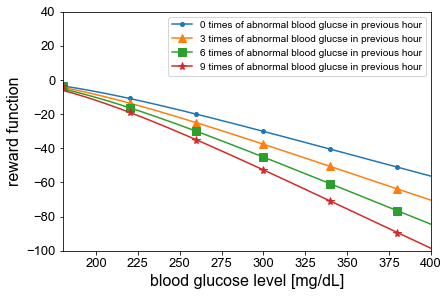

In [57]:
from bgp.rl import reward_functions
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

font={'family':'arial',
      'weight':'normal',
      'size':10}
matplotlib.rc('font',**font)
plt.figure(figsize=(6.6,4.4))

temp=0
symbol=['.',"^",'s','*']
for k in range(1,12,3):
    strart_x=range(180,600)
    x=[[i]*k for i in range(180,600)]
    y=[reward_functions.magni_reward_duration(i) for i in x]
    plt.plot(strart_x,y,marker=symbol[temp],markevery=40,markersize=8,label=f'{k-1} times of abnormal blood glucse in previous hour')
    temp+=1
# x_6=[[i]*6 for i in range(180,600)]
# y_6=[-reward_functions.magni_reward_duration(i) for i in x_6]
# x_5=[[i]*5 for i in range(180,600)]
# y_5=[-reward_functions.magni_reward_duration(i) for i in x_5]
# x_3=[[i]*3 for i in range(180,600)]
# y_3=[-reward_functions.magni_reward_duration(i) for i in x_3]
# x_4=[[i]*4 for i in range(180,600)]
# y_4=[-reward_functions.magni_reward_duration(i) for i in x_4]
plt.tick_params(labelsize=13)
plt.xlim(180,400)
plt.ylim(-100,40)
plt.xlabel('blood glucose level [mg/dL]',fontsize=16)
plt.ylabel('reward function',fontsize=16)
plt.legend()
plt.savefig('risk_function.pdf',dpi=800)

plt.show()

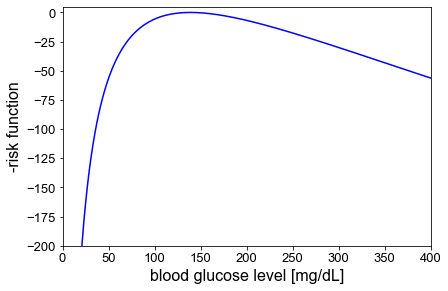

In [56]:
plt.figure(figsize=(6.6,4.4))
plt.tight_layout()
x=np.arange(1,600)
y=[-reward_functions.magni_risk(i) for i in x]
plt.plot(x,y,color='b')
plt.tick_params(labelsize=13)
plt.xlim(0,400)
plt.ylim(-200,5)
plt.xlabel('blood glucose level [mg/dL]',fontsize=16)
plt.ylabel('-risk function',fontsize=16)
plt.savefig('-risk_function.pdf',dpi=300)
plt.show()
# # plt.hlines(13.38,0,data.shape[0],colors='red',lw=1)
# plt.hlines(1.6,0,data.shape[0],colors='red',lw=1)
# # plt.hlines(9.83,0,data.shape[0],colors='red',lw=1)

# plt.title('adolescent#001网络训练过程')

In [1]:
import joblib
data=joblib.load('saves_rlkit_21d/sac_duration_meal/sac_duration_meal;seed=0;person=child#006;/simulate_detail_.pkl')
data

,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,Magni_Risk
Time,,,,,,,,
2018-01-01 00:00:00,142.000577,165.113775,0.0,0.000000,0.0,1.888673,1.888673,0.025493
2018-01-01 00:05:00,142.000556,164.542376,0.0,0.047375,0.0,1.888670,1.888670,0.025492
2018-01-01 00:10:00,141.999195,162.654936,0.0,0.001658,0.0,1.888514,1.888514,0.025470
2018-01-01 00:15:00,141.986657,161.222390,0.0,0.000250,0.0,1.887078,1.887078,0.025268
2018-01-01 00:20:00,141.941207,160.615963,0.0,0.000633,0.0,1.881878,1.881878,0.024540
...,...,...,...,...,...,...,...,...
2018-01-15 23:40:00,165.307185,175.527499,0.0,0.000000,0.0,5.174185,5.174185,1.567425
2018-01-15 23:45:00,167.108000,176.102213,0.0,0.000000,0.0,5.470747,5.470747,1.767934
2018-01-15 23:50:00,168.522569,176.413363,0.0,0.000000,0.0,5.707222,5.707222,1.932220


In [2]:
start=data.index[0]
end=data.index[10]
start+pd.DateOffset(hours=4)


NameError: name 'pd' is not defined

In [65]:
import joblib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
font={'family':'arial',
      'weight':'normal',
      'size':15}
matplotlib.rc('font',**font)
times=6
x=np.linspace(0,times,times*12)
data=joblib.load('saves_rlkit_21d/sac_duration_meal/sac_duration_meal;seed=0;person=child#006;/simulate_detail_.pkl')

lunchu=[i.hour in range(10,14) for i in data[data['CHO']!=0].index]
lunchu_time=data[data['CHO']!=0][lunchu]
lunch_times=[[i,i+pd.DateOffset(hours=times)] for i in lunchu_time.index]

# keyword='insulin'
keyword='BG'
temp=None
for start,end in lunch_times:
    # print(data.loc[start:end])
    if temp is None:
        temp=data.loc[start:end][keyword][:-1].reset_index(drop=True)
 
    else:
        temp=temp+data.loc[start:end][keyword][:-1].reset_index(drop=True)
temp=temp/len(lunch_times)

In [66]:
data_dir = 'saves' # '/data/dir'
source_dir = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg'  # '/source/dir'
name = 'pid'
save_dir = '{}/{}'.format(data_dir, name)

person_options = (['adolescent#0{}'.format(str(i).zfill(2)) for i in [6]] +
                  ['child#0{}'.format(str(i).zfill(2)) for i in [6]] +
                  ['adult#0{}'.format(str(i).zfill(2)) for i in [6]])
person_options=(['child#006'])

for person in person_options:
    data=joblib.load('{}/{}_simulation_1.pkl'.format(save_dir, person))
    print("当前用户为"+person)
    data=data[0]['hist']
    lunchu=[i.hour in range(10,14) for i in data[data['CHO']!=0].index]
    lunchu_time=data[data['CHO']!=0][lunchu]
    lunch_times=[[i,i+pd.DateOffset(hours=times)] for i in lunchu_time.index]
    
    pid=None
    for start,end in lunch_times:
        # print(data.loc[start:end])
        if pid is None:
            pid=data.loc[start:end][keyword][:-1].reset_index(drop=True)
     
        else:
            pid=pid+data.loc[start:end][keyword][:-1].reset_index(drop=True)
    pid=pid/len(lunch_times)
    print(pid)

当前用户为child#006
0     118.200696
1     116.595085
2     116.376215
3     118.869112
4     125.181961
         ...    
67    165.119148
68    170.632144
69    176.005377
70    181.244560
71    186.370027
Name: BG, Length: 72, dtype: float64


In [67]:
data_dir = 'saves' # '/data/dir'
source_dir = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg'  # '/source/dir'
name = 'pid_ma'
save_dir = '{}/{}'.format(data_dir, name)

person_options = (['adolescent#0{}'.format(str(i).zfill(2)) for i in [6]] +
                  ['child#0{}'.format(str(i).zfill(2)) for i in [6]] +
                  ['adult#0{}'.format(str(i).zfill(2)) for i in [6]])
person_options=(['child#006'])

for person in person_options:
    data=joblib.load('{}/{}_simulation_1.pkl'.format(save_dir, person))
    print("当前用户为"+person)
    data=data[0]['hist']
    lunchu=[i.hour in range(10,14) for i in data[data['CHO']!=0].index]
    lunchu_time=data[data['CHO']!=0][lunchu]
    lunch_times=[[i,i+pd.DateOffset(hours=times)] for i in lunchu_time.index]
    
    pidma=None
    for start,end in lunch_times:
        # print(data.loc[start:end])
        if pidma is None:
            # pidma=data.loc[start:end]['insulin'][:-1].reset_index(drop=True)
            pidma=data.loc[start:end][keyword][:-1].reset_index(drop=True)
     
        else:
            # pidma=pidma+data.loc[start:end]['insulin'][:-1].reset_index(drop=True)
            pidma=pidma+data.loc[start:end][keyword][:-1].reset_index(drop=True)
    pidma=pidma/len(lunch_times)
    print(pidma)

当前用户为child#006
0     111.839863
1     111.205957
2     111.793981
3     114.780642
4     121.135497
         ...    
67    141.924431
68    145.986805
69    149.902793
70    153.694591
71    157.400303
Name: BG, Length: 72, dtype: float64


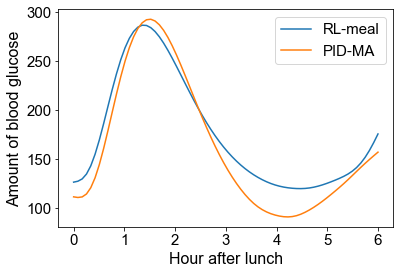

In [69]:
plt.plot(x,temp,label="RL-meal")
# plt.plot(x,pid,label="PID")
plt.plot(x,pidma,label="PID-MA")
plt.xticks(np.linspace(0,6,7))
plt.xlabel('Hour after lunch',fontsize=16)
# plt.ylabel('Amount of blood glucose',fontsize=18)
plt.ylabel('Amount of blood glucose',fontsize=16)
plt.legend(fontsize=15)
plt.savefig('bg-change.pdf',dpi=300,bbox_inches='tight')
plt.show()

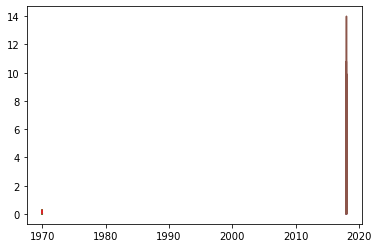

In [127]:
import matplotlib.pyplot as plt
BG=data['BG']
CHO=data['CHO']
insulin=data['insulin']
risk=data['Magni_Risk']

plt.plot(insulin)
plt.plot(CHO)
plt.show()

In [7]:
s='HG[3|BCACA]F'
def compress(str ):
        # write code here
        def decode(s):
            if len(s)==0:
                return ''
            left=-1
            right=-1
            shu=-1
            for index,i in enumerate(s):
                if i=='[' and left==-1:
                    left=index
                elif i==']':
                    right=index
                elif i=='|' and shu==-1:
                    shu=index
            if left==right==-1:
                return int(s.split('|')[0])*s.split('|')[1]
            return int(s.split('|')[0])*(s[shu+1:left]+decode(s[left+1:right]))
        left_stack=[]
        part_pair=[]
        for index,i in enumerate(str):
            if i=='[':
                left_stack.append(index)
            elif i==']':
                start=left_stack.pop()
                if len(left_stack)==0:
                    part_pair.append([start,index])
        res=''
        for i,j in part_pair:
            
        return res
    
compress(s)

'HGBCACABCACABCACAF'

In [ ]:
front=[]
back=[]
heights=[5,3,8,3,2,5]
length=len(heights)
for i in range(length):
    count=1
    highest=heights[i+1]
    for j in range(i+1,length):
        count

In [5]:
import joblib
path=r'D:\MyWorks\糖尿病预测\强化学习方法\rl4bg\bgp\saves\pid\child#004_simulation_8weeks.pkl'
data=joblib.load(path)

Time
2018-01-01 00:00:00    156.829286
2018-01-01 00:05:00    156.257885
2018-01-01 00:10:00    154.369763
2018-01-01 00:15:00    152.930035
2018-01-01 00:20:00    152.299800
                          ...    
2018-02-26 23:40:00    137.081949
2018-02-26 23:45:00    134.317490
2018-02-26 23:50:00    133.145467
2018-02-26 23:55:00    132.769989
2018-02-27 00:00:00    132.216391
Name: CGM, Length: 16417, dtype: float64